# 01. Importing libraries

In [39]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Importing data

In [40]:
# Python shortcut - reusable path
path = r'C:\Users\thoma\OneDrive\Dokumente\data analytics\Data Project 4\06-2025 Instacart Basket Analysis'

In [41]:
path

'C:\\Users\\thoma\\OneDrive\\Dokumente\\data analytics\\Data Project 4\\06-2025 Instacart Basket Analysis'

In [42]:
# Importing dataframe
df_merged = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'Pr_merged_Task4.9(1).pkl'))

In [43]:
df_merged.shape

(30356957, 31)

In [44]:
df_merged['order_id'].describe()

count    3.035696e+07
mean     1.710736e+06
std      9.872460e+05
min      2.000000e+00
25%      8.561350e+05
50%      1.710892e+06
75%      2.565520e+06
max      3.421083e+06
Name: order_id, dtype: float64

In [45]:
df_merged['user_id'].describe()

count    3.035696e+07
mean     1.029339e+05
std      5.946892e+04
min      1.000000e+00
25%      5.140900e+04
50%      1.025960e+05
75%      1.543850e+05
max      2.062090e+05
Name: user_id, dtype: float64

In [46]:
df_merged.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', '_merge1', 'product_name', 'aisle_id', 'department_id',
       'prices', '_merge2', 'Busiest days', 'busiest_period_of_day',
       'max_order', 'loyalty_flag', 'average_price', 'order_frequency',
       'First Name', 'Surname', 'Gender', 'STATE', 'Age', 'date_joined',
       'n_dependants', 'fam_status', 'income', '_merge'],
      dtype='object')

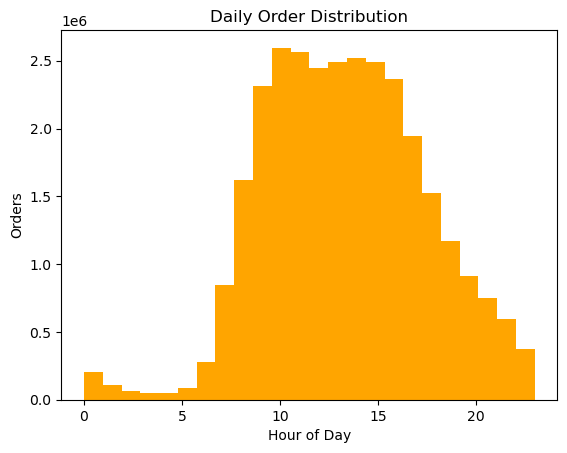

In [47]:
# Question 3. (part 2) - histogram of the “order_hour_of_day” column using 24 bins (one for each hour)
hist = df_merged['order_hour_of_day'].plot.hist(bins=24, color='orange')
hist.set_title("Daily Order Distribution")
hist.set_xlabel("Hour of Day")
hist.set_ylabel("Orders")
plt.show()

In [48]:
# Frequency check via table
df_merged['order_hour_of_day'].value_counts().sort_index()

order_hour_of_day
0.0      203627
1.0      108193
2.0       64017
3.0       47894
4.0       49442
5.0       82805
6.0      275087
7.0      845501
8.0     1624168
9.0     2313739
10.0    2596274
11.0    2566940
12.0    2448050
13.0    2489731
14.0    2519533
15.0    2489838
16.0    2367121
17.0    1945590
18.0    1522301
19.0    1170216
20.0     910845
21.0     746953
22.0     592918
23.0     376174
Name: count, dtype: int64

In [49]:
# Saving the histogram
hist.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'hist_ohod_task4.9(2).png'))

# The histogram shows:
    # Peak order around 10 am
    # And a steady decline after 3 pm

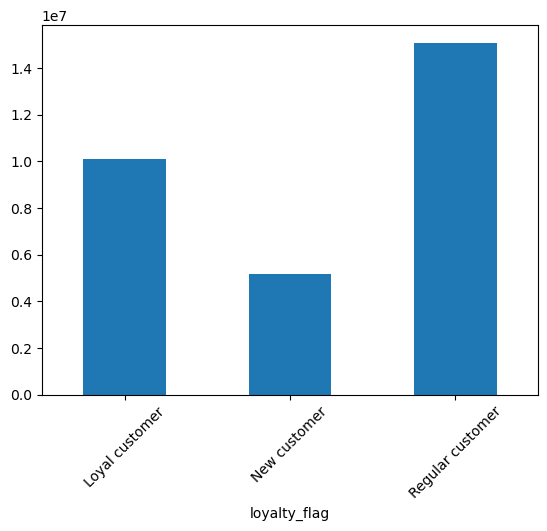

In [50]:
# Question 4. - distribution of orders among customers in terms of loyalty
bar = df_merged['loyalty_flag'].value_counts().sort_index().plot.bar()
plt.xticks(rotation=45)
plt.show()

In [51]:
df_merged['loyalty_flag'].value_counts(dropna = False)

loyalty_flag
Regular customer    15095623
Loyal customer      10105134
New customer         5156200
Name: count, dtype: int64

In [52]:
bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_loyalty_task4.9(2).png'))

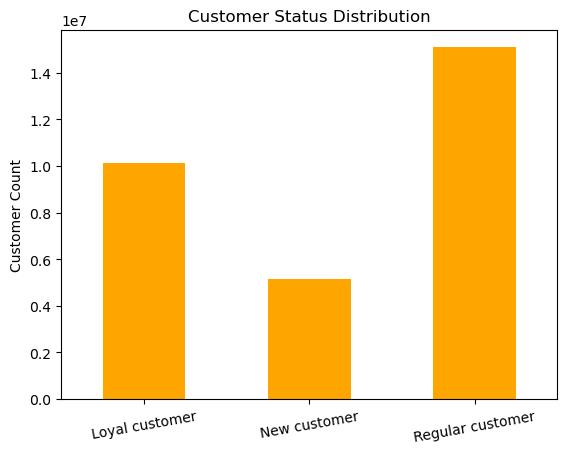

In [65]:
bar2 = df_merged['loyalty_flag'].value_counts().sort_index().plot.bar(color = 'orange')
plt.title("Customer Status Distribution")
bar2.set_xlabel("")
bar2.set_ylabel('Customer Count')
plt.xticks(rotation=10)
plt.show()

In [66]:
bar2.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_loyalty2_task4.9(2).png'))

In [55]:
# Question 5. - creating a seed of random floating numbers
np.random.seed(2)
# Creating a list holding True/False values to the test np.random.rand() <= 0.7
dev = np.random.rand(len(df_merged)) <= 0.7

In [56]:
dev

array([ True,  True,  True, ...,  True, False,  True])

In [57]:
# Storing 70% of the sample
big = df_merged[dev]

In [58]:
# Storing 30% of the sample
small = df_merged[~dev]

In [59]:
# Reducing the sample to only those columns necessary for the chart
df_merged_2 = small[['order_hour_of_day','prices']]

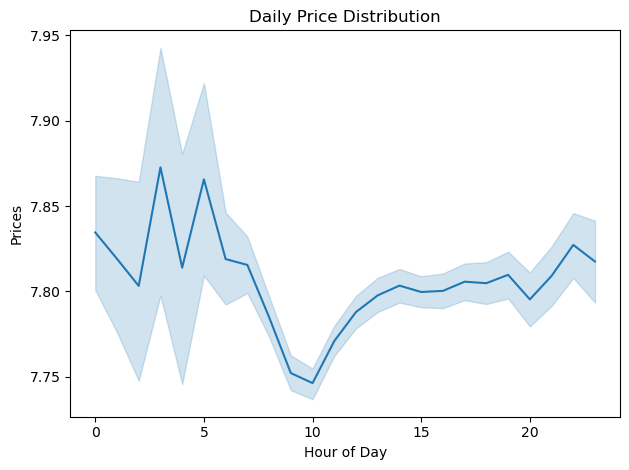

In [61]:
# Line chart
line = sns.lineplot(data = df_merged_2, x = 'order_hour_of_day',y = 'prices')
line.set_title("Daily Price Distribution")
line.set_xlabel('Hour of Day')
line.set_ylabel('Prices')
line.figure.tight_layout()
plt.show()

In [62]:
# Saving the line chart
line.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'line_ohod_task4.9(2).png'))

In [23]:
# Question 6. - connection between 'Age' and 'n_dependants'
# Reducing the sample to only those columns necessary for the chart
df_merged_3 = small[['Age','n_dependants']]

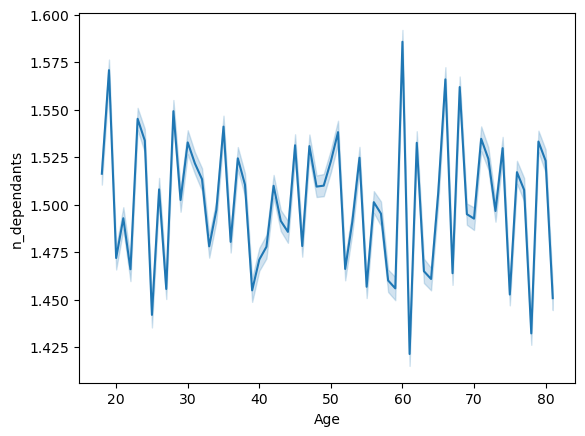

In [24]:
# Line chart no. 2
line_2 = sns.lineplot(data = df_merged_3, x = 'Age',y = 'n_dependants')

In [25]:
# Saving line chart no. 2
line_2.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'line_2_n_dep_task4.9(2).png'))

# The line chart shows:
    # No clear influence of age on the number of dependants

In [40]:
# Question 7. - connection between 'Age' and 'income'
# Reducing the sample to only those columns necessary for the chart
df_merged_4 = small[['Age','income']]

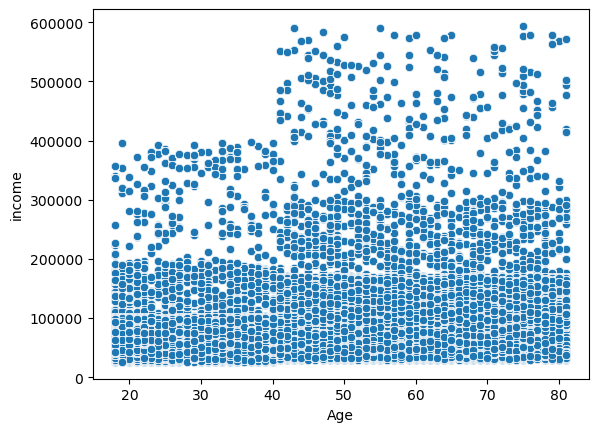

In [41]:
# Scatterplot
scatter = sns.scatterplot(data = df_merged_4, x = 'Age',y = 'income')

# The scatterplot shows:
    # An inscrease in income by the age of 40
    # More incomes within the range of 2000-3000 and some even above
    # No clear relationship or correlation with most observations within the range of up to 2000, but potentially a difference in mean values for the ages up to 40 and above 40 years old

In [42]:
# Saving the scatterplot
scatter.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'scatter_income_task4.9(2).png'))

In [43]:
# Exporting the dataframe
df_merged.to_pickle(os.path.join(path, 'Data', 'Prepared Data', 'Pr_merged_Task4.9.pkl'))